In [1]:
using Flux
using Plots
using Statistics

In [2]:
function generate_real_data(n)
    x1 = rand(1,n) .- 0.5
    x2 = x1 .* x1
    return vcat(x1,x2)
end

function D()
    return Chain(
            Dense(2, 25,relu),
            Dense(25,1,x->σ.(x))
            )
end

function G(latent_dim::Int)
    return Chain(
            Dense(latent_dim, 15,relu),
            Dense(15,2)
            )
end


G (generic function with 1 method)

In [3]:
loss_D(x, y, dscr) = sum(Flux.Losses.binarycrossentropy(dscr(x), y))

function trainDiscriminator!(dscr,gen,train_size)
    real = generate_real_data(train_size)
    fake = gen(rand(5,train_size))

    X    = hcat(real,fake)
    Y    = vcat(ones(train_size),zeros(train_size))
    data = Flux.DataLoader((X, Y'), batchsize=128,shuffle=true);
    for d in data
        gs = gradient(Flux.params(dscr)) do
            l = loss_D(d...,dscr)
        end
        Flux.update!(opt, Flux.params(dscr), gs)
    end
end

loss_G(z,gen,dscr) = sum(Flux.Losses.binarycrossentropy(dscr(gen(z)),1))

function trainGenerator!(gen,dscr,train_size)
    noise = rand(5,train_size)
    data = Flux.DataLoader(noise, batchsize=128,shuffle=true);
    for d in data
        gs = gradient(Flux.params(gen)) do
            l = loss_G(d,gen,dscr)
        end
        Flux.update!(opt, Flux.params(gen), gs)
    end
    fake_generated = gen(rand(5,train_size))
end


trainGenerator! (generic function with 1 method)

In [4]:
gen  = G(5)
dscr = D()
opt  = ADAM()
train_size = 2000
epochs = 10000

10000

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(5 => 15, relu)  # 90 parameters
│   summary(x) = "5×2000 Matrix{Float64}"
└ @ Flux ~/.julia/packages/Flux/Wz6D4/src/layers/stateless.jl:60


(mean(dscr(real)), mean(dscr(fake))) = (0.48845488f0, 0.4765617f0)
(mean(dscr(real)), mean(dscr(fake))) = (0.4985958f0, 0.49439448f0)
(mean(dscr(real)), mean(dscr(fake))) = (0.49475062f0, 0.49668032f0)
(mean(dscr(real)), mean(dscr(fake))) = (0.49249804f0, 0.49712652f0)
(mean(dscr(real)), mean(dscr(fake))) = (0.49165678f0, 0.5002104f0)
(mean(dscr(real)), mean(dscr(fake))) = (0.4847599f0, 0.4891373f0)
(mean(dscr(real)), mean(dscr(fake))) = (0.51882875f0, 0.5099982f0)
(mean(dscr(real)), mean(dscr(fake))) = (0.4970449f0, 0.4985873f0)
(mean(dscr(real)), mean(dscr(fake))) = (0.48323956f0, 0.48919827f0)
(mean(dscr(real)), mean(dscr(fake))) = (0.5012471f0, 0.5050225f0)


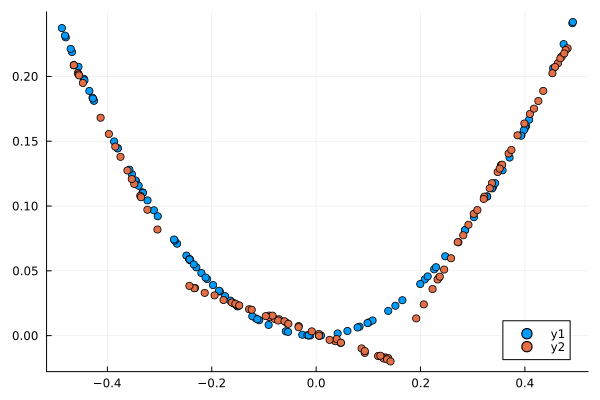

In [5]:
for e in 1:epochs
    trainDiscriminator!(dscr,gen,train_size)
    trainGenerator!(gen,dscr,train_size)
    if e%1000 == 0
        real = generate_real_data(train_size)
        fake = gen(rand(5,train_size))
        @show mean(dscr(real)),mean(dscr(fake))
    end
end

real = generate_real_data(train_size)
fake = gen(rand(5,train_size))
scatter(real[1,1:100],real[2,1:100])
scatter!(fake[1,1:100],fake[2,1:100])

# References
- [ ] [1D GAN with Flux](https://discourse.julialang.org/t/1d-gan-with-flux/54179)
- [ ] [ds-curriculum/generative/1D-GAN-julia.ipynb](https://github.com/joofio/ds-curriculum/blob/main/generative/1D-GAN-julia.ipynb)